In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\babuk\Downloads\new_train_sample.csv')

# Initial Inspection
print("Dataset Shape:", data.shape)

Dataset Shape: (4758418, 46)


In [4]:
# Calculate the percentage of non-null values for each column
non_null_percentage = data.notnull().mean() * 100
print(non_null_percentage)

Unnamed: 0            100.000000
Id                    100.000000
OrgId                 100.000000
IncidentId            100.000000
AlertId               100.000000
Timestamp             100.000000
DetectorId            100.000000
AlertTitle            100.000000
Category              100.000000
MitreTechniques        42.562087
IncidentGrade          99.458328
ActionGrouped           0.592907
ActionGranular          0.592907
EntityType            100.000000
EvidenceRole          100.000000
DeviceId              100.000000
Sha256                100.000000
IpAddress             100.000000
Url                   100.000000
AccountSid            100.000000
AccountUpn            100.000000
AccountObjectId       100.000000
AccountName           100.000000
DeviceName            100.000000
NetworkMessageId      100.000000
EmailClusterId          1.012458
RegistryKey           100.000000
RegistryValueName     100.000000
RegistryValueData     100.000000
ApplicationId         100.000000
Applicatio

In [5]:
# Identify columns with less than 80% non-null values
columns_to_drop = non_null_percentage[non_null_percentage < 75].index

# Drop those columns
data = data.drop(columns=columns_to_drop)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Id                  int64 
 2   OrgId               int64 
 3   IncidentId          int64 
 4   AlertId             int64 
 5   Timestamp           object
 6   DetectorId          int64 
 7   AlertTitle          int64 
 8   Category            object
 9   IncidentGrade       object
 10  EntityType          object
 11  EvidenceRole        object
 12  DeviceId            int64 
 13  Sha256              int64 
 14  IpAddress           int64 
 15  Url                 int64 
 16  AccountSid          int64 
 17  AccountUpn          int64 
 18  AccountObjectId     int64 
 19  AccountName         int64 
 20  DeviceName          int64 
 21  NetworkMessageId    int64 
 22  RegistryKey         int64 
 23  RegistryValueName   int64 
 24  RegistryValueData   int64 
 25  ApplicationId     

In [7]:
# Convert all int64 columns to int32
data = data.astype({col: 'int32' for col in data.select_dtypes(include='int64').columns})

In [13]:
#Analyze the distribution of the target variable
print(data['IncidentGrade'].value_counts())

IncidentGrade
BenignPositive    2054774
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64


In [73]:
data.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         24824
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [17]:
#first few rows to get an overview of the dataset:
print(data.head())

   Unnamed: 0    Id  OrgId  IncidentId  AlertId                 Timestamp  \
0     5172780  1668     26       18583   687462  2024-06-06T05:56:47.000Z   
1     8470561  3244     33        5065     3990  2024-06-03T10:45:09.000Z   
2     5897583  3818    201      150787   807590  2024-06-13T03:36:40.000Z   
3     3288552  2691    204      108287    28575  2024-06-08T16:54:57.000Z   
4     4060961   444     54      528202  1458226  2024-06-09T02:48:01.000Z   

   DetectorId  AlertTitle            Category   IncidentGrade  ...  \
0          31         813             Malware  BenignPositive  ...   
1          38          25              Impact  BenignPositive  ...   
2         419         444           Execution  BenignPositive  ...   
3          44        1233  SuspiciousActivity    TruePositive  ...   
4         102       58829        Exfiltration  BenignPositive  ...   

  ApplicationName OAuthApplicationId  FileName  FolderPath  ResourceIdName  \
0            3421                881  

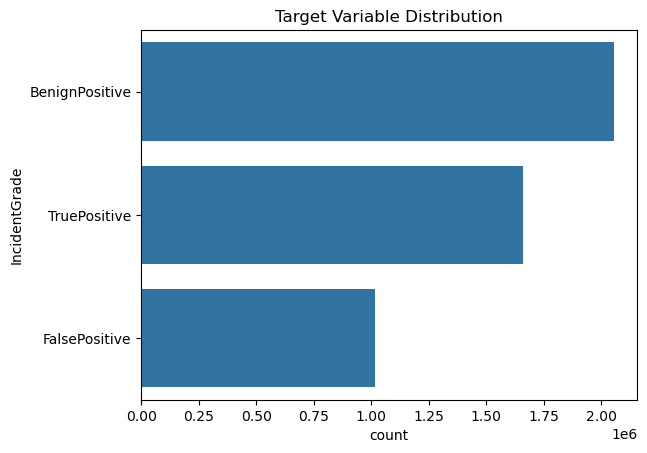

In [65]:
#Plot the distribution of the target variable:
sns.countplot(data['IncidentGrade'])
plt.title("Target Variable Distribution")
plt.show()

In [15]:
data['IncidentGrade'].fillna('BenignPositive',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_3592\3628283889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IncidentGrade'].fillna('BenignPositive',inplace=True)


In [17]:
data.duplicated().sum()

0

In [18]:
# Droping duplicate rows from the dataset
data = data.drop_duplicates()

print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows after removing duplicates: 4758418


In [19]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [23]:
# Convert Timestamp to datetime if not already
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# 1. Feature Engineering: Creating New Features
# 1.1. Time-related features
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour

In [83]:
datatr=data.copy()

In [24]:
# Drop the original 'timestamp' column
data = data.drop(columns=['Timestamp'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4602224 entries, 0 to 4758417
Data columns (total 39 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   IncidentGrade       object             
 9   EntityType          object             
 10  EvidenceRole        object             
 11  DeviceId            int64              
 12  Sha256              int64              
 13  IpAddress           int64              
 14  Url                 int64              
 15  AccountSid          int64              
 16  AccountUpn          int64              
 17  AccountObjectId     int64       

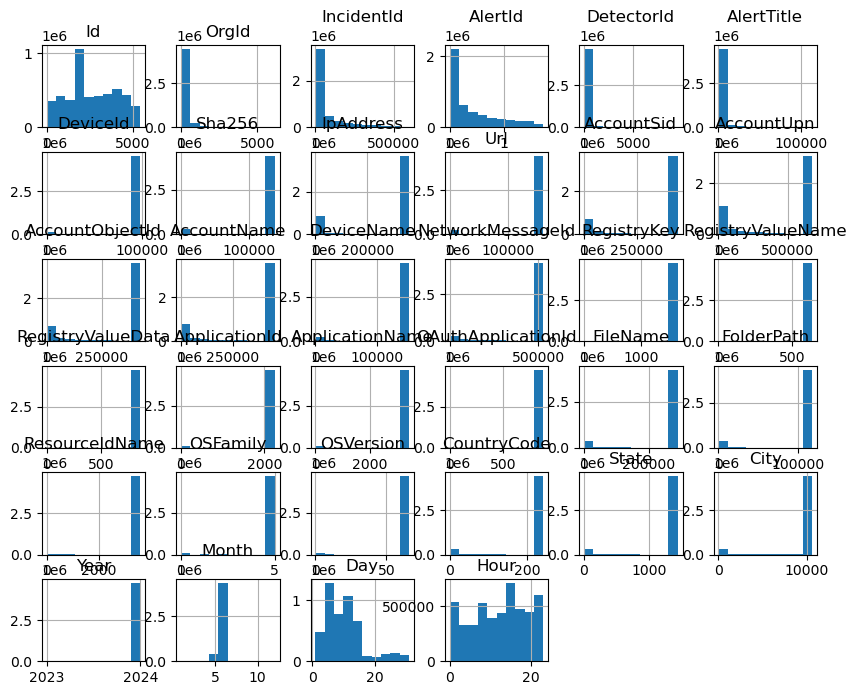

In [76]:
data.hist(figsize=(10,8))
plt.show()

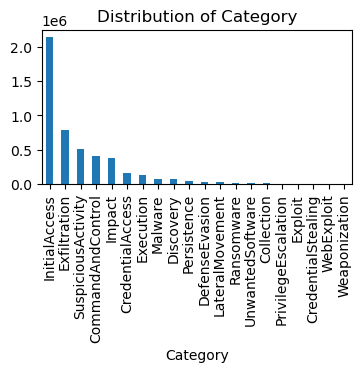

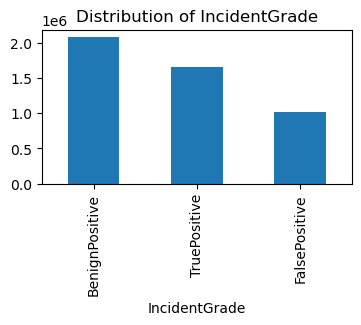

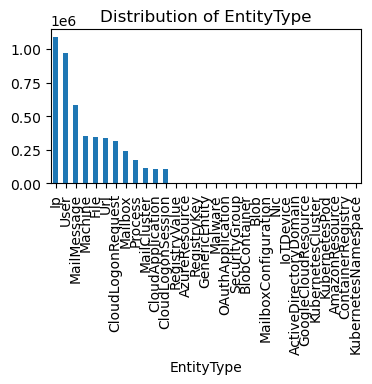

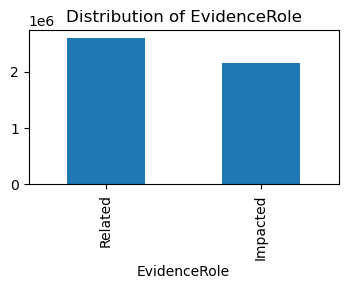

In [78]:
# Bar plot for categorical data
# List of categorical columns in DataFrame
categorical_columns = data.select_dtypes(include=['object','category'])

for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [25]:
# List of Numerical columns in DataFrame
numeric_columns = data.select_dtypes(include=['int32', 'int64', 'float64'])
# cheking num columns
numeric_columns.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [26]:
# ID columns that don't help in model training
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
              'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName']

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

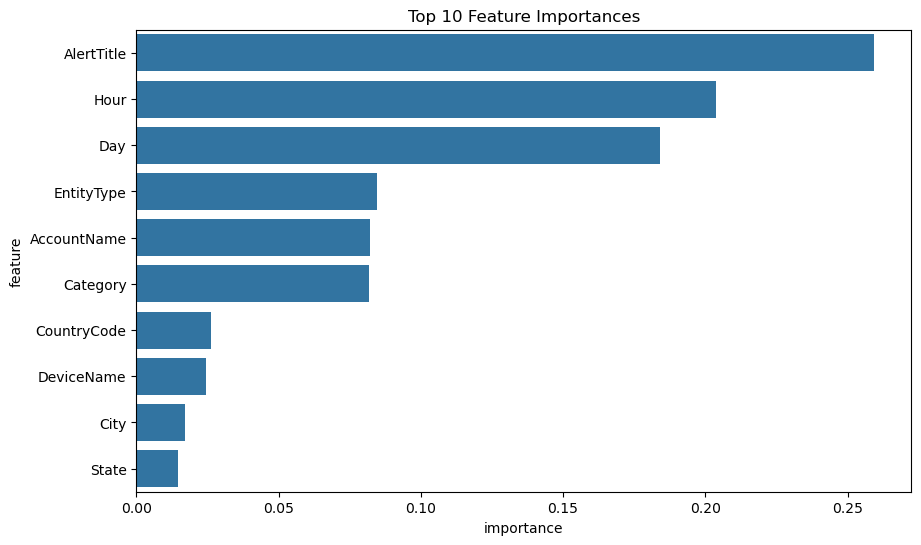

In [33]:
train_sample = data.sample(frac=0.001, random_state=42)
X = train_sample.drop(id_columns + ['IncidentGrade'], axis=1, errors='ignore')
y = train_sample['IncidentGrade']

non_numeric_cols = X.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [35]:
#total df imp
imp_features= [
    'Alert Title', 'Hour', 'Day', 'AccountName', 'Category', 'EntityType', 'DeviceName', 'CountryCode', 'State', 'City']

In [37]:
data.nunique()

Id                       5403
OrgId                    5607
IncidentId             432289
AlertId               1163873
DetectorId               7908
AlertTitle              80121
Category                   20
IncidentGrade               3
EntityType                 31
EvidenceRole                2
DeviceId                55410
Sha256                  73078
IpAddress              195384
Url                     85332
AccountSid             270273
AccountUpn             398767
AccountObjectId        262205
AccountName            276656
DeviceName              81164
NetworkMessageId       260032
RegistryKey               937
RegistryValueName         401
RegistryValueData         496
ApplicationId            1003
ApplicationName          1610
OAuthApplicationId        416
FileName               142641
FolderPath              59652
ResourceIdName           1516
OSFamily                    6
OSVersion                  48
CountryCode               212
State                    1197
City      

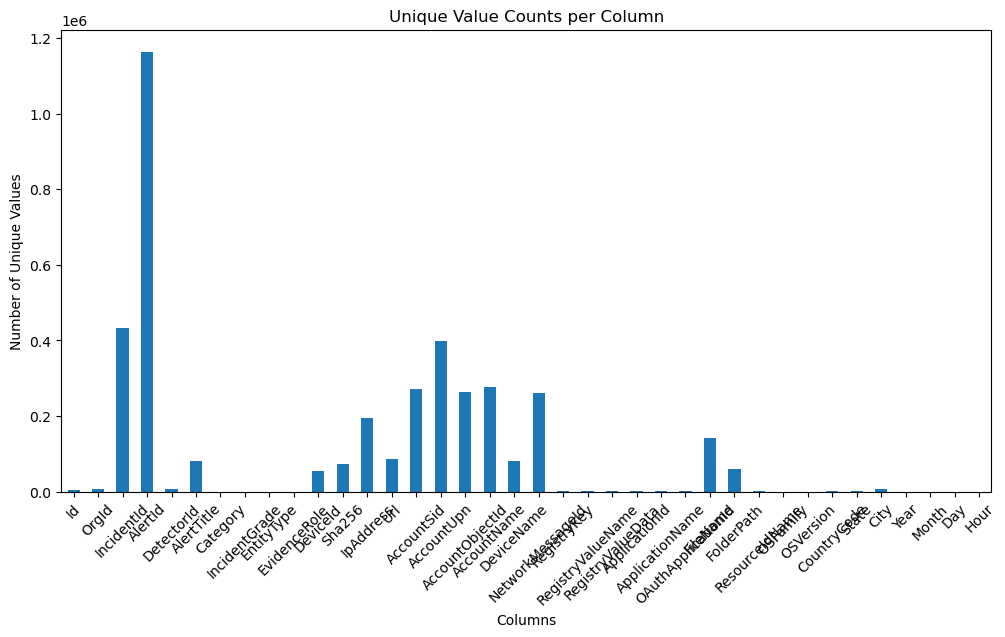

In [39]:
unique_counts = data.nunique()
unique_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Unique Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.show()

In [102]:
data['AlertTitle'].value_counts()

AlertTitle
0         666728
1         387327
2         298559
4         206642
3         205582
           ...  
99358          1
100448         1
107790         1
73911          1
112069         1
Name: count, Length: 80121, dtype: int64

In [104]:
data['Url'].value_counts()

Url
160396    4417360
0            4083
1            3339
2            2631
6            2096
           ...   
159765          1
100013          1
19221           1
34890           1
105506          1
Name: count, Length: 85332, dtype: int64

In [106]:
data['DeviceName'].value_counts().head(20)

DeviceName
153085    4409810
0            2199
1            1964
4            1092
5            1084
6             907
13            861
7             824
10            778
8             757
9             743
11            645
16            618
12            595
14            555
15            540
22            502
20            475
28            456
17            398
Name: count, dtype: int64

In [108]:
data['City'].value_counts()

City
10630    4441811
0          51718
1          11136
2           9764
3           7911
          ...   
6221           1
8018           1
9766           1
7387           1
7059           1
Name: count, Length: 7107, dtype: int64

In [110]:
data['OrgId'].value_counts()

OrgId
0       422606
2       120447
1       105293
3        95032
5        87118
         ...  
4306         1
6013         1
4561         1
4379         1
3909         1
Name: count, Length: 5607, dtype: int64

In [103]:
datatrain=data.copy()

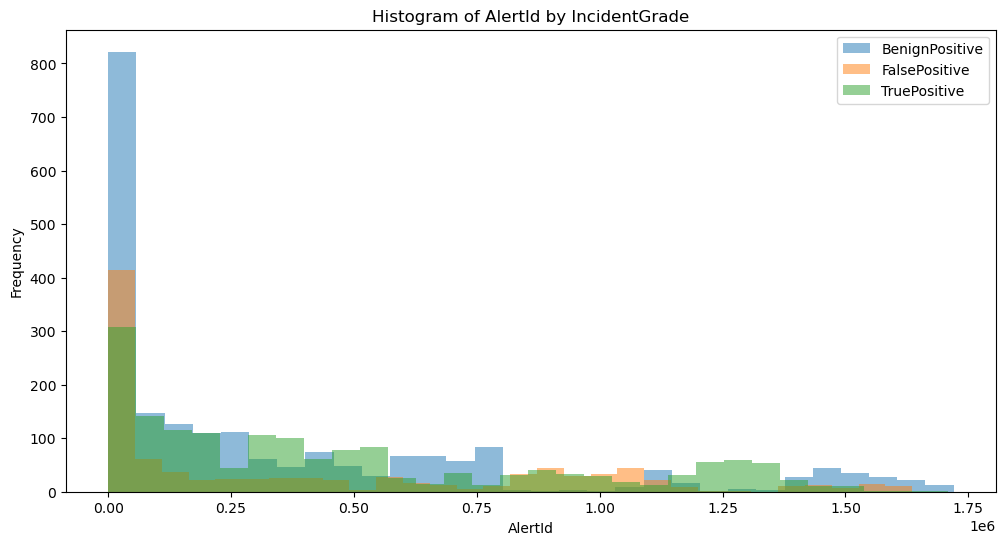

In [41]:
train_sample = data.sample(frac=0.001, random_state=42)

plt.figure(figsize=(12, 6))
for grade in train_sample['IncidentGrade'].unique():
    subset = train_sample[train_sample['IncidentGrade'] == grade]
    plt.hist(subset['AlertId'], bins=30, alpha=0.5, label=grade)

plt.xlabel('AlertId')
plt.ylabel('Frequency')
plt.title('Histogram of AlertId by IncidentGrade')
plt.legend()
plt.show()

In [43]:
# These features have minimal importance or are unlikely to impact your classification outcome
columns_to_drop = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DetectorId','Sha256', 'IpAddress', 
    'AccountSid', 'AccountUpn', 'AccountObjectId', 'DeviceId', 'NetworkMessageId',
    'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName',
    'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSVersion'
]
data.drop(columns=columns_to_drop, inplace=True)

In [45]:
print(data.columns)
data.shape

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'Url', 'AccountName', 'DeviceName', 'OSFamily', 'CountryCode', 'State',
       'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


(4758418, 16)

In [47]:
categorical_columns = ['AlertTitle', 'Category', 'EntityType', 'EvidenceRole',
       'Url', 'AccountName', 'DeviceName', 'OSFamily', 'CountryCode', 'State', 'City', 'Year',
       'Month', 'Day', 'Hour']

In [49]:
# List of columns to process
columns_to_group = ['AlertTitle', 'Url', 'AccountName', 'DeviceName', 'CountryCode', 'State', 'City']

# Looping through each column and grouping the less frequent values into "Others"
for column in columns_to_group:
    category_counts = data[column].value_counts()
    top_categories = category_counts.nlargest(5).index
    data[column] = data[column].where(data[column].isin(top_categories), 'Others')

# Now verifing the changes
data

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Url,AccountName,DeviceName,OSFamily,CountryCode,State,City,Year,Month,Day,Hour
0,Others,Malware,BenignPositive,File,Related,160396,453297,153085,5,242,1445,10630,2024,6,6,5
1,Others,Impact,BenignPositive,Machine,Impacted,160396,453297,Others,5,242,1445,10630,2024,6,3,10
2,Others,Execution,BenignPositive,Machine,Impacted,160396,453297,Others,5,242,1445,10630,2024,6,13,3
3,Others,SuspiciousActivity,TruePositive,File,Related,160396,453297,153085,5,242,1445,10630,2024,6,8,16
4,Others,Exfiltration,BenignPositive,File,Impacted,160396,453297,153085,5,242,1445,10630,2024,6,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,Others,Exfiltration,FalsePositive,MailMessage,Impacted,160396,453297,153085,5,242,1445,10630,2024,6,10,10
4758414,2,CommandAndControl,FalsePositive,User,Impacted,160396,Others,153085,5,242,1445,10630,2024,6,11,19
4758415,1,InitialAccess,BenignPositive,MailMessage,Related,160396,453297,153085,5,242,1445,10630,2024,6,9,4
4758416,Others,Impact,BenignPositive,Ip,Related,160396,453297,153085,5,242,1445,10630,2024,5,21,23


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4602224 entries, 0 to 4758417
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     object
 1   Category       object
 2   IncidentGrade  int32 
 3   EntityType     object
 4   EvidenceRole   object
 5   Url            object
 6   AccountName    object
 7   DeviceName     object
 8   OSFamily       int64 
 9   CountryCode    object
 10  State          object
 11  City           object
 12  Year           int32 
 13  Month          int32 
 14  Day            int32 
 15  Hour           int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 509.1+ MB


In [51]:
data.to_csv("processed_train_data.csv", index=False)

In [53]:
# Label Encoding for IncidentGrade (Target Variable)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['IncidentGrade'] = le.fit_transform(data['IncidentGrade'])

# One-Hot Encoding for nominal features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [123]:
data.shape

(4602224, 152)

In [55]:
data = data.reset_index(drop=True)

In [57]:
# Saveing the data using Joblib
joblib.dump(data, 'encoded_train_data.joblib')

['encoded_train_data.joblib']

In [59]:
# Loading the data using Joblib
traindata = joblib.load('encoded_train_data.joblib')

In [61]:
traindata.head()

,IncidentGrade,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_Others,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# TEST DATA
import pandas as pd
# Load the dataset
data1 = pd.read_csv(r'C:\Users\babuk\Downloads\GUIDE_Test.csv')

# Initial Inspection
print("Dataset Shape:", data1.shape)

Dataset Shape: (4147992, 46)


In [64]:
# Calculate the percentage of non-null values for each column
non_null_percentage = data1.notnull().mean() * 100
print(non_null_percentage)

Id                    100.000000
OrgId                 100.000000
IncidentId            100.000000
AlertId               100.000000
Timestamp             100.000000
DetectorId            100.000000
AlertTitle            100.000000
Category              100.000000
MitreTechniques        44.380221
IncidentGrade         100.000000
ActionGrouped           0.046119
ActionGranular          0.046119
EntityType            100.000000
EvidenceRole          100.000000
DeviceId              100.000000
Sha256                100.000000
IpAddress             100.000000
Url                   100.000000
AccountSid            100.000000
AccountUpn            100.000000
AccountObjectId       100.000000
AccountName           100.000000
DeviceName            100.000000
NetworkMessageId      100.000000
EmailClusterId          1.005474
RegistryKey           100.000000
RegistryValueName     100.000000
RegistryValueData     100.000000
ApplicationId         100.000000
ApplicationName       100.000000
OAuthAppli

In [65]:
# Identify columns with less than 80% non-null values
columns_to_drop = non_null_percentage[non_null_percentage < 75].index

# Drop those columns
data1 = data1.drop(columns=columns_to_drop)

In [66]:
# Convert all int64 columns to int32
data1 = data1.astype({col: 'int32' for col in data1.select_dtypes(include='int64').columns})

In [67]:
data1.drop(columns='Usage',inplace=True)
# checking the shape of column
data1.shape[1]

35

In [68]:
data1.duplicated().sum()

225297

In [75]:
# Droping duplicate rows from the dataset
data1 = data1.drop_duplicates()

print(f"Number of rows after removing duplicates: {data1.shape[0]}")

Number of rows after removing duplicates: 3922695


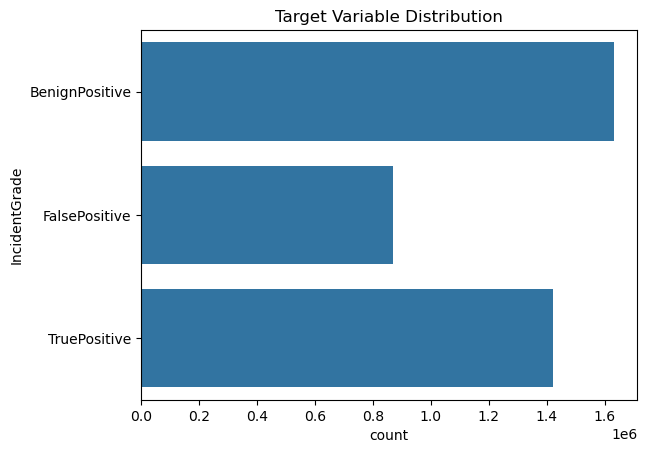

In [31]:
#Plot the distribution of the target variable:
sns.countplot(data1['IncidentGrade'])
plt.title("Target Variable Distribution")
plt.show()

In [33]:
# Target variable distribution
print("Target variable distribution:")
data1['IncidentGrade'].value_counts()

Target variable distribution:


IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [77]:
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
data1['Year'] = data1['Timestamp'].dt.year
data1['Month'] = data1['Timestamp'].dt.month
data1['Day'] = data1['Timestamp'].dt.day
data1['Hour'] = data1['Timestamp'].dt.hour

data1.drop(columns='Timestamp',inplace=True)

In [81]:
Test1=data1.copy()

In [39]:
data1.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

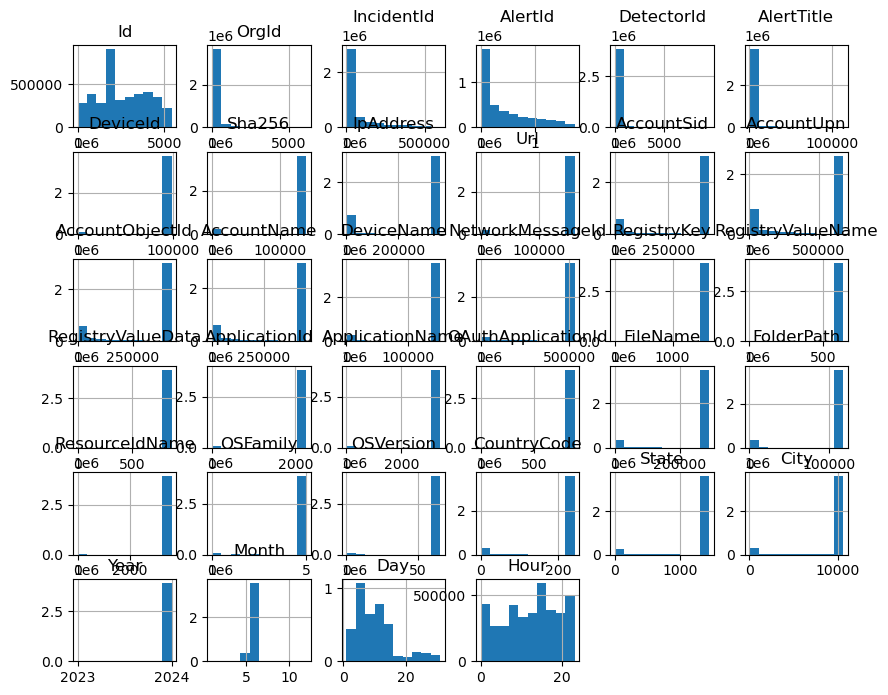

In [41]:
data1.hist(figsize=(10,8))
plt.show()

In [83]:
# List of numeric columns in DataFrame
numeric_columns = data1.select_dtypes(include=['int8','int16', 'int32', 'int64', 'float64'])

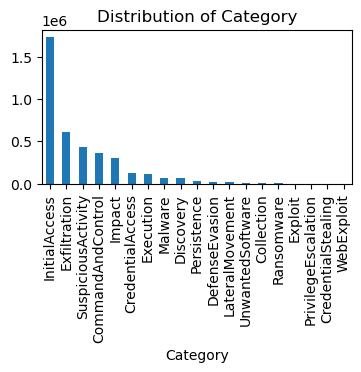

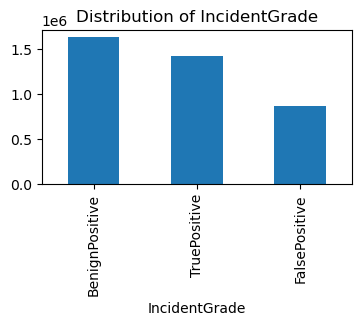

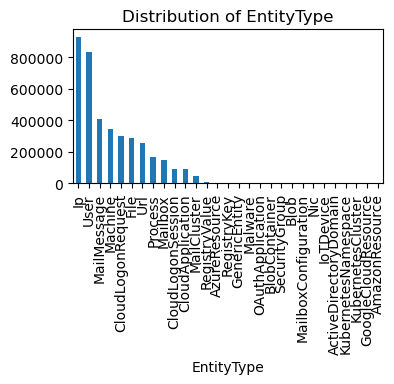

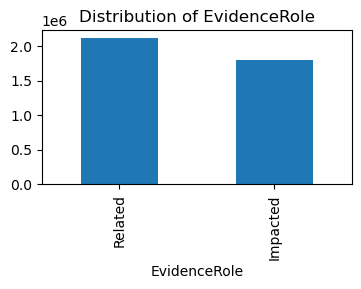

In [163]:
# Bar plot for categorical data
# List of categorical columns in DataFrame
categorical_columns = data1.select_dtypes(include=['object','category'])

for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    data1[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

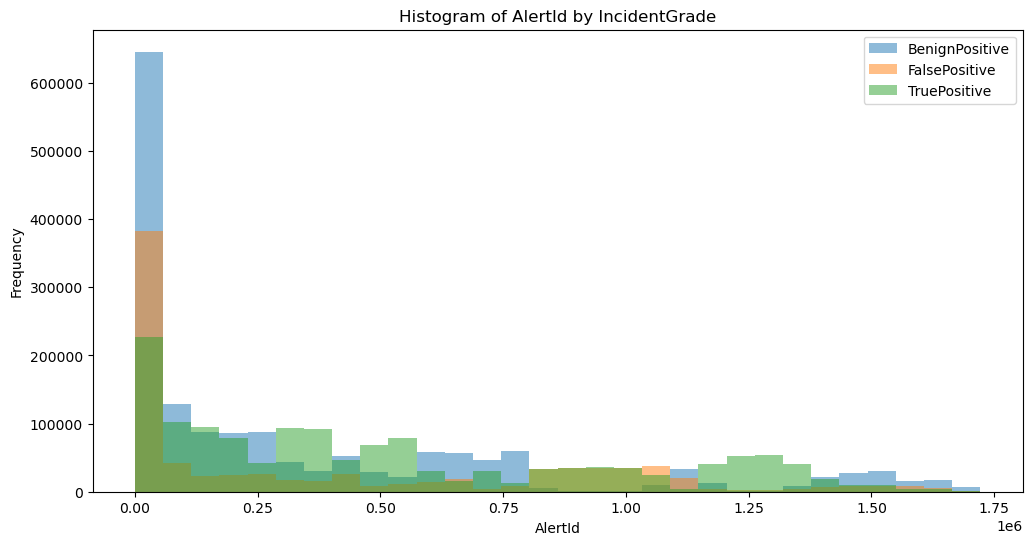

In [85]:
plt.figure(figsize=(12, 6))
for grade in data1['IncidentGrade'].unique():
    subset = data1[data1['IncidentGrade'] == grade]
    plt.hist(subset['AlertId'], bins=30, alpha=0.5, label=grade)

plt.xlabel('AlertId')
plt.ylabel('Frequency')
plt.title('Histogram of AlertId by IncidentGrade')
plt.legend()
plt.show()

In [86]:
print(data1.columns)
len(data1.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


38

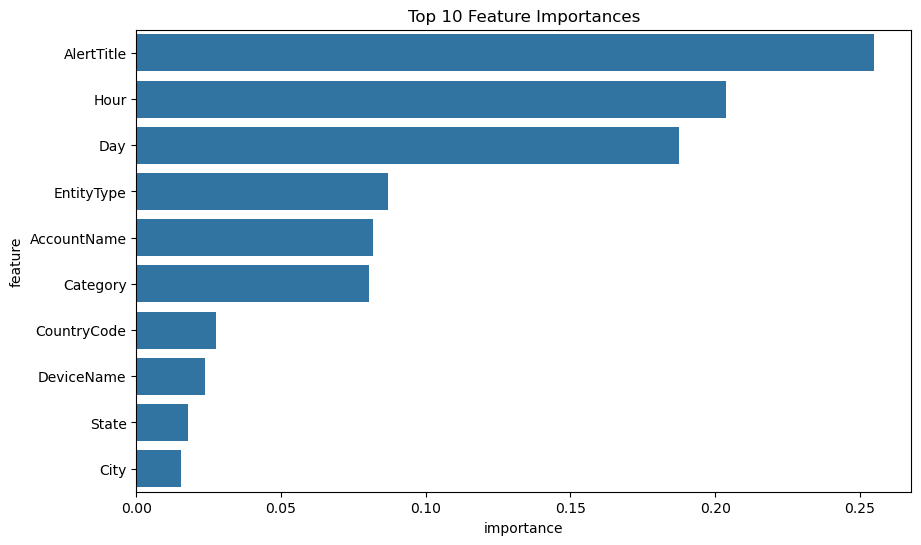

In [89]:
test_sample = data1.sample(frac=0.001, random_state=42)
X = train_sample.drop(id_columns + ['IncidentGrade'], axis=1, errors='ignore')
y = train_sample['IncidentGrade']

non_numeric_cols = X.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [91]:
# These features have minimal importance or are unlikely to impact your classification outcome
columns_to_drop = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DetectorId','Sha256', 'IpAddress', 
    'AccountSid', 'AccountUpn', 'AccountObjectId', 'DeviceId', 'NetworkMessageId',
    'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName',
    'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSVersion'
]
data1.drop(columns=columns_to_drop, inplace=True)

In [93]:
data1.shape

(3922695, 16)

In [95]:
categorical_columns = ['AlertTitle', 'Category', 'EntityType', 'EvidenceRole',
       'Url', 'AccountName', 'DeviceName', 'OSFamily', 'CountryCode', 'State', 'City', 'Year',
       'Month', 'Day', 'Hour']

In [97]:
# List of columns to process
columns_to_group = ['AlertTitle', 'Url', 'AccountName', 'DeviceName', 'CountryCode', 'State', 'City']

# Looping through each column and grouping the less frequent values into "Others"
for column in columns_to_group:
    category_counts = data1[column].value_counts()
    top_categories = category_counts.nlargest(5).index
    data1[column] = data1[column].where(data1[column].isin(top_categories), 'Others')

# Now verifing the changes
data1

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Url,AccountName,DeviceName,OSFamily,CountryCode,State,City,Year,Month,Day,Hour
0,Others,LateralMovement,BenignPositive,User,Impacted,160396,Others,153085,5,242,1445,10630,2024,6,4,22
1,2,CommandAndControl,BenignPositive,Machine,Impacted,160396,453297,Others,0,242,1445,10630,2024,6,3,12
2,Others,LateralMovement,BenignPositive,Process,Related,160396,453297,153085,5,242,1445,10630,2024,6,8,3
3,0,InitialAccess,FalsePositive,CloudLogonSession,Related,160396,453297,153085,5,242,1445,10630,2024,6,12,12
4,Others,Discovery,BenignPositive,User,Impacted,160396,Others,153085,5,242,1445,10630,2024,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,Others,Malware,BenignPositive,Machine,Impacted,160396,453297,4,0,242,1445,10630,2024,6,3,20
4147987,Others,InitialAccess,BenignPositive,User,Impacted,160396,Others,153085,5,242,1445,10630,2024,6,4,3
4147988,Others,InitialAccess,BenignPositive,User,Impacted,160396,Others,153085,5,242,1445,10630,2024,6,4,19
4147989,Others,CommandAndControl,FalsePositive,Ip,Related,160396,453297,153085,5,242,1445,10630,2024,6,15,0


In [99]:
data1.to_csv("processed_test_data.csv", index=False)

In [101]:
# Label Encoding for IncidentGrade (Target Variable)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['IncidentGrade'] = le.fit_transform(data1['IncidentGrade'])

# One-Hot Encoding for nominal features
data1 = pd.get_dummies(data1, columns=categorical_columns, drop_first=True)

In [103]:
data1.shape

(3922695, 148)

In [123]:
data1=beforetest.copy()

In [127]:
print(data.shape)
print(data1.shape)

(4758418, 152)
(3922695, 148)


In [129]:
data, data1 = data.align(data1, join='left', axis=1)
data1.fillna(0, inplace=True)

In [131]:
data1.shape

(3922695, 152)

In [133]:
testdata = data1.reset_index(drop=True)

In [135]:
# Saveing the data using Joblib
joblib.dump(testdata, 'encoded_test_data.joblib')

['encoded_test_data.joblib']

In [137]:
# Loading the data using Joblib
test_data = joblib.load('encoded_test_data.joblib')

In [139]:
test_data.head()

,IncidentGrade,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_Others,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [3]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [143]:
# Loading the encoded train and test data
train_data = joblib.load('encoded_train_data.joblib', mmap_mode='r')
test_data = joblib.load('encoded_test_data.joblib', mmap_mode='r')

# Separateing features (X) and target variable (y)
X = train_data.drop(columns=['IncidentGrade'])
y = train_data['IncidentGrade']

# Spliting the data (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [145]:
X_train_subsample = X_train.sample(frac=0.1, random_state=42)
y_train_subsample = y_train.loc[X_train_subsample.index]

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42),
}

for model_name, model in models.items():
    print(f'Model: {model_name}')
    
    model.fit(X_train_subsample, y_train_subsample)
    
    y_pred = model.predict(X_val)
    
    # Evaluateing the models
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    
    # Displaying the results of the modles
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(cm)
    print('-' * 50)

Model: Logistic Regression
Accuracy: 0.630881679212848
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71    416110
           1       0.65      0.15      0.24    203156
           2       0.71      0.60      0.65    332418

    accuracy                           0.63    951684
   macro avg       0.65      0.55      0.53    951684
weighted avg       0.65      0.63      0.59    951684

Confusion Matrix:
[[370755  10344  35011]
 [125698  30222  47236]
 [126783   6212 199423]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.6855647462813287
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74    416110
           1       0.65      0.41      0.50    203156
           2       0.73      0.67      0.70    332418

    accuracy                           0.69    951684
   macro avg       0.68      0.64      0.65    951684


In [147]:
# Createing a report data
report = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting'],
    'Accuracy': [0.6318, 0.7005, 0.7011, 0.6777, 0.6756, 0.6414],
    'Macro-F1 Score': [0.54, 0.67, 0.67, 0.62, 0.61, 0.55],
    'Precision': [0.64, 0.70, 0.70, 0.71, 0.72, 0.69],
    'Recall': [0.55, 0.66, 0.66, 0.61, 0.61, 0.56]
}

df = pd.DataFrame(report)

print("Comparison Table:")
print(df.to_string(index=False))

best_models_with_max_f1 = df[df['Macro-F1 Score'] == df['Macro-F1 Score'].max()]

if len(best_models_with_max_f1) > 1:
    best_model = best_models_with_max_f1.loc[best_models_with_max_f1['Accuracy'].idxmax()]
else:
    best_model = df.loc[df['Macro-F1 Score'].idxmax()]

print("\nBest Model Based on Macro-F1 Score (and Accuracy in case of a tie):")
print(best_model)

Comparison Table:
              Model  Accuracy  Macro-F1 Score  Precision  Recall
Logistic Regression    0.6318            0.54       0.64    0.55
      Decision Tree    0.7005            0.67       0.70    0.66
      Random Forest    0.7011            0.67       0.70    0.66
            XGBoost    0.6777            0.62       0.71    0.61
           LightGBM    0.6756            0.61       0.72    0.61
  Gradient Boosting    0.6414            0.55       0.69    0.56

Best Model Based on Macro-F1 Score (and Accuracy in case of a tie):
Model             Random Forest
Accuracy                 0.7011
Macro-F1 Score             0.67
Precision                   0.7
Recall                     0.66
Name: 2, dtype: object


In [149]:
# Loading the encoded train data
train_data = joblib.load('encoded_train_data.joblib', mmap_mode='r')

# Separating the features (X) and target variable (y)
X = train_data.drop('IncidentGrade', axis=1)
y = train_data['IncidentGrade']

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

# Splitting the data (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsampling the training data to 2% for quicker processing
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.02, stratify=y_train, random_state=42)

if X_train_sampled.select_dtypes(include=['bool']).shape[1] > 0:
    X_train_sampled = X_train_sampled.astype(int)

# Applying SMOTE for multi-class classification (default strategy balances all classes equally)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

# Hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 75],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5,
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fitting the Randomized Search with resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_rf = random_search.best_estimator_

# Evaluating on validation data
y_pred = best_rf.predict(X_val)

# Printing the results
print("Best Hyperparameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Saving the tuned model
joblib.dump(best_rf, "rf_smote_tuned_model.joblib")
print("Model saved as rf_smote_tuned_model.joblib")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'n_estimators': 75, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68    416110
           1       0.46      0.51      0.49    203156
           2       0.70      0.63      0.66    332418

    accuracy                           0.63    951684
   macro avg       0.61      0.61      0.61    951684
weighted avg       0.64      0.63      0.63    951684

Confusion Matrix:
[[288040  73721  54349]
 [ 64053 104374  34729]
 [ 74438  48123 209857]]
Model saved as rf_smote_tuned_model.joblib


In [151]:
# Loading the encoded train data
train_data = joblib.load('encoded_train_data.joblib', mmap_mode='r')

# Separating the features (X) and target variable (y)
X = train_data.drop('IncidentGrade', axis=1)
y = train_data['IncidentGrade']

# Splitting the data (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsampling the training data to 2% for quicker processing
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.02, stratify=y_train, random_state=42)

# Random Forest without SMOTE
rf_no_smote = RandomForestClassifier(random_state=42, n_jobs=-1)

# Training the model
rf_no_smote.fit(X_train_sampled, y_train_sampled)
y_pred_no_smote = rf_no_smote.predict(X_val)

print("Classification Report Without SMOTE:")
print(classification_report(y_val, y_pred_no_smote))

print("Confusion Matrix Without SMOTE:")
print(confusion_matrix(y_val, y_pred_no_smote))

import joblib
joblib.dump(rf_no_smote, "rf_no_smote_model.joblib")

Classification Report Without SMOTE:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71    416110
           1       0.56      0.41      0.47    203156
           2       0.70      0.66      0.68    332418

    accuracy                           0.66    951684
   macro avg       0.64      0.62      0.62    951684
weighted avg       0.65      0.66      0.65    951684

Confusion Matrix Without SMOTE:
[[323177  37544  55389]
 [ 79549  83214  40393]
 [ 85653  27119 219646]]


['rf_no_smote_model.joblib']

In [5]:
# Loading the saved Random Forest model
best_rf = joblib.load("rf_smote_tuned_model.joblib")

# Loading the test dataset
test_data = joblib.load('encoded_test_data.joblib', mmap_mode='r')

# Separateing the features and target from test data
X_test = test_data.drop('IncidentGrade', axis=1)  
y_test = test_data['IncidentGrade']

# Makeing predictions on the test data
y_test_pred = best_rf.predict(X_test)

# Evaluateing the saved model on the test data
print("\nClassification Report on Test Data:")
report = classification_report(y_test, y_test_pred, output_dict=True)
print(classification_report(y_test, y_test_pred))

macro_f1 = report['macro avg']['f1-score']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']

print("\nMacro-F1 Score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65   1630942
           1       0.42      0.46      0.44    868897
           2       0.70      0.62      0.65   1422856

    accuracy                           0.60   3922695
   macro avg       0.58      0.58      0.58   3922695
weighted avg       0.61      0.60      0.60   3922695


Macro-F1 Score: 0.58
Macro Precision: 0.58
Macro Recall: 0.58

Confusion Matrix on Test Data:
[[1084658  322288  223996]
 [ 311523  397028  160346]
 [ 307472  235607  879777]]


In [7]:
# Loading the encoded train data
train_data = joblib.load('encoded_train_data.joblib', mmap_mode='r')

# Separating the features (X) and target variable (y)
X = train_data.drop('IncidentGrade', axis=1)
y = train_data['IncidentGrade']

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

# Splitting the data (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsampling the training data to 2% for quicker processing
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.02, stratify=y_train, random_state=42)

if X_train_sampled.select_dtypes(include=['bool']).shape[1] > 0:
    X_train_sampled = X_train_sampled.astype(int)

# Applying SMOTE for multi-class classification (default strategy balances all classes equally)
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_sampled, y_train_sampled)

# Hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 75],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5,
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fitting the Randomized Search with resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_rf = random_search.best_estimator_

# Evaluating on validation data
y_pred = best_rf.predict(X_val)

# Printing the results
print("Best Hyperparameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Saving the tuned model
joblib.dump(best_rf, "rf_smote_enn_tuned_model.joblib")
print("Model saved as rf_smote_enn_tuned_model.joblib")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.52      0.59    416110
           1       0.36      0.61      0.46    203156
           2       0.69      0.62      0.66    332418

    accuracy                           0.58    951684
   macro avg       0.58      0.59      0.57    951684
weighted avg       0.62      0.58      0.59    951684

Confusion Matrix:
[[215237 142655  58218]
 [ 43343 124738  35075]
 [ 50133  74940 207345]]
Model saved as rf_smote_enn_tuned_model.joblib
